In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

from torch import nn
from torch.nn import functional as F

import importlib
import sys 
import getpass

sys.path.append('/home/luca_ltpn/DL-Fleuret/Proj_308427_348143_XXXXXX')
sys.path.append('/home/luca_ltpn/DL-Fleuret')
from Miniproject_1.model import *

In [18]:
valid_in, valid_tg = torch.load('/home/luca_ltpn/DL-Fleuret/val_data.pkl') #validation set (noise-clean)
train_in, train_tg = torch.load('/home/luca_ltpn/DL-Fleuret/train_data.pkl') #test set (noise-noise)

cut = 15000
valid_in = valid_in.float()/ 255.
valid_tg = valid_tg.float()/ 255.
train_in = train_in[:cut].float()/ 255.
train_tg = train_tg[:cut].float()/ 255.

In [19]:
mod = Model()

mod.num_epochs = 15
mod.batch_size = 16
mod.eta        = 0.1
mod.momentum   = 0.9
mod.weight_decay = 0.

In [20]:
mod.train(train_in, train_tg, val_input=valid_in, val_target=valid_tg)

0	 1.264	 0.068	 12.200
2000	 94.906	 0.019	 17.774
4000	 85.619	 0.010	 20.346
6000	 84.892	 0.007	 21.990
8000	 84.755	 0.006	 22.413
10000	 84.734	 0.006	 23.076
12000	 84.221	 0.006	 22.627
14000	 84.231	 0.006	 22.547
16000	 42.106	 0.006	 22.811
18000	 84.157	 0.006	 22.937
20000	 84.057	 0.005	 23.363
22000	 84.406	 0.005	 23.790
24000	 83.876	 0.005	 23.760
26000	 84.114	 0.005	 23.781
28000	 84.121	 0.005	 23.880
30000	 83.629	 0.005	 23.333
32000	 83.897	 0.006	 22.497
34000	 83.710	 0.005	 23.718
36000	 83.837	 0.005	 23.789
38000	 84.152	 0.005	 23.885
40000	 84.302	 0.005	 23.860
42000	 83.854	 0.005	 23.957
44000	 83.912	 0.005	 23.892
46000	 41.356	 0.005	 23.944
48000	 83.857	 0.005	 23.776
50000	 83.867	 0.005	 23.631
52000	 84.178	 0.005	 23.834
54000	 83.737	 0.005	 24.042
56000	 83.948	 0.005	 23.545
58000	 83.959	 0.005	 24.105
60000	 83.523	 0.005	 24.073
62000	 83.104	 0.006	 22.245
64000	 83.592	 0.005	 23.928
66000	 83.655	 0.004	 24.210
68000	 84.013	 0.005	 2

In [21]:
mod.validate(valid_in, valid_tg)[1]

tensor(24.5491)

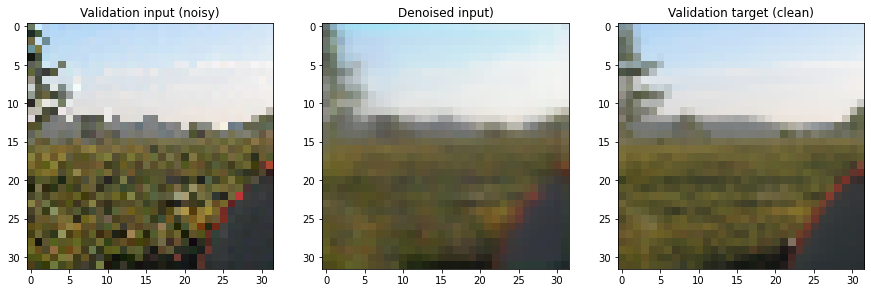

In [22]:
fig,ax = plt.subplots(1,3, figsize=(15,12))
select = 161

img = valid_in[[select]]
img_raw  = (img[0].permute(1,2,0)*255.).int()
img_won  = (mod.predict(img)[0].permute(1,2,0)*255.).int()
img_true = (valid_tg[select].permute(1,2,0)*255.).int()

ax[0].imshow(img_raw, origin='upper')
ax[1].imshow(img_won, origin='upper')
ax[2].imshow(img_true, origin='upper')

ax[0].set_title("Validation input (noisy)")
ax[1].set_title("Denoised input)")
ax[2].set_title("Validation target (clean)");